In [22]:
import os
import pandas as pd
data_path = r"C:\Users\Nishi sharma\global_terriorism_analysis\data\globalterrorismdb_0718dist.csv"
# Check if the file exists
if os.path.exists(data_path):
    gtd = pd.read_csv(data_path, encoding="ISO-8859-1", low_memory=False)
    print("Dataset loaded successfully!")
else:
    print(f"File not found: {data_path}")

    gtd = pd.read_csv(data_path, encoding="ISO-8859-1", low_memory=False)

# Display the first few rows
print("Dataset Loaded Successfully!")
gtd.head()


Dataset loaded successfully!
Dataset Loaded Successfully!


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [23]:
# Check for missing values
print(gtd.isnull().sum())

# Drop columns that are not useful for analysis
gtd = gtd.drop(columns=["hostkidoutcome", "nkillter", "nkillter", "property"])

# Fill missing values or drop rows/columns with too many missing values
gtd = gtd.fillna(0)  # Example: Filling NaN with 0 (can adjust based on columns)


eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [28]:
gtd.columns = gtd.columns.str.strip()  # Remove leading/trailing whitespaces from column names
print(gtd.columns)


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=132)


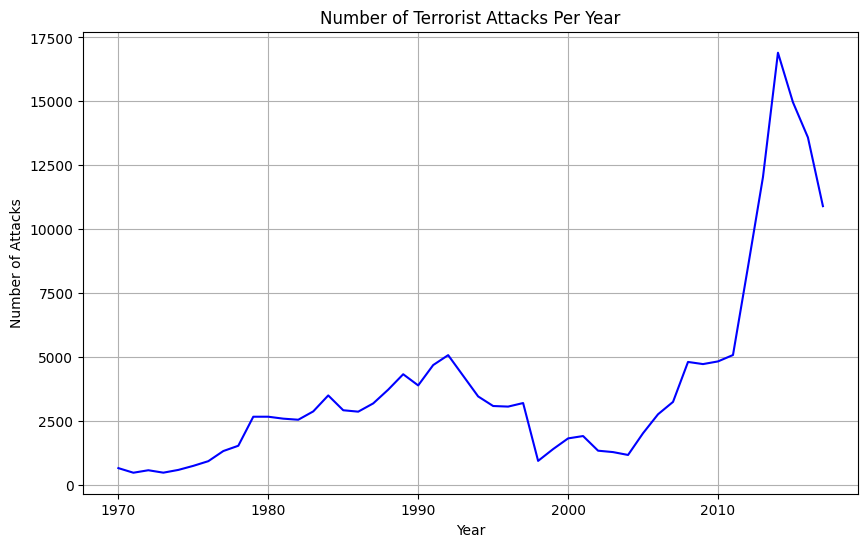

In [29]:
import matplotlib.pyplot as plt

# Ensure that 'year' column is of integer type (we did this earlier)
gtd["iyear"] = pd.to_numeric(gtd["iyear"], errors='coerce')  # Convert to numeric, coercing errors to NaN
gtd = gtd.dropna(subset=["iyear"])  # Drop rows where 'year' is NaN
gtd["iyear"] = gtd["iyear"].astype(int)  # Convert 'year' to integer

# Group by year and count incidents
attacks_per_year = gtd.groupby("iyear").size()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, color='blue')
plt.title("Number of Terrorist Attacks Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.show()


C:\Users\Nishi sharma\AppData\Local\Temp\ipykernel_31964\473612470.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attacks_per_country.values, y=attacks_per_country.index, palette="viridis")


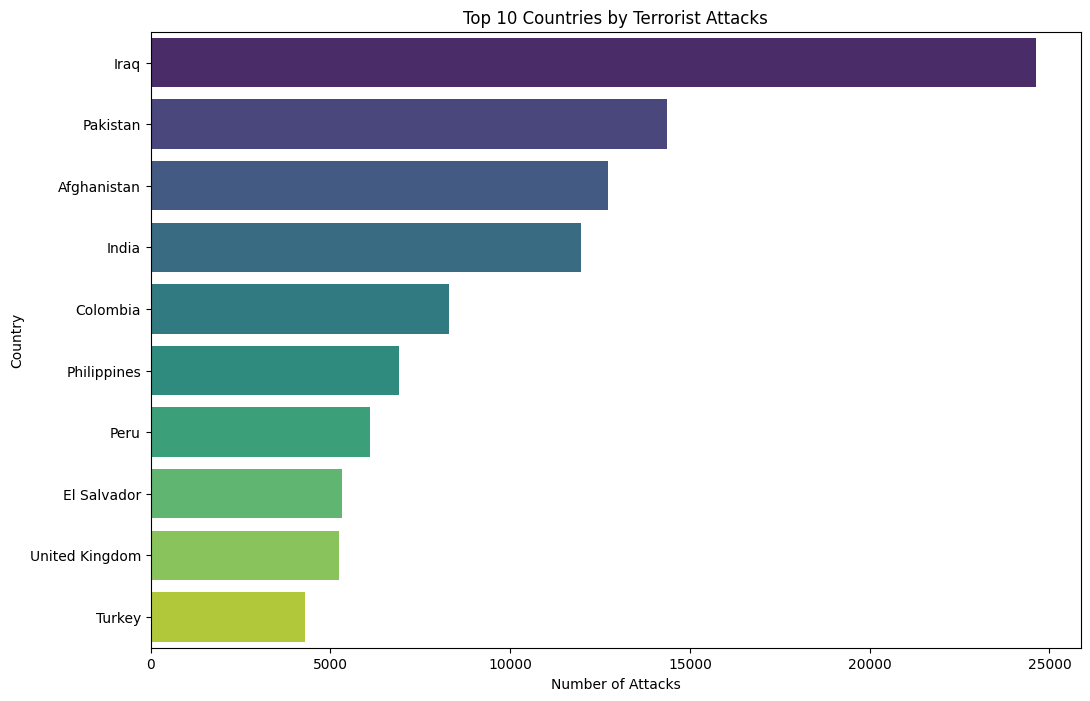

In [30]:
import seaborn as sns

# Group by country and count incidents
attacks_per_country = gtd.groupby("country_txt").size().sort_values(ascending=False).head(10)

# Plot the top 10 countries
plt.figure(figsize=(12, 8))
sns.barplot(x=attacks_per_country.values, y=attacks_per_country.index, palette="viridis")
plt.title("Top 10 Countries by Terrorist Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.show()


In [40]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

# Example of using plotly to visualize attacks by country
fig = px.scatter_geo(gtd,
                     locations="country_txt", 
                     size="nkill", 
                     color="iyear",  
                     hover_name="country_txt",
                     title="Global Terrorism Hotspots by Year")

fig.show()
